In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [34]:
df = pd.read_csv('spotify.csv')

df

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [35]:
df.head(10)

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
5,Drake,God's Plan,87,198973,6DCZcSspjsKoFjzjrWoCdn
6,Drake,Passionfruit,86,298940,5mCPDVBb16L4XQwDdbRUpz
7,Travis Scott,MELTDOWN (feat. Drake),86,246133,67nepsnrcZkowTxMWigSbb
8,Drake,Fair Trade (with Travis Scott),85,291175,40iJIUlhi6renaREYGeIDS
9,Drake,Rich Flex,85,239359,1bDbXMyjaUIooNwFE9wn0N


In [36]:
# Standardize column names for convenience
df = df.rename(columns={
    "Artist": "artist",
    "Track Name": "track_name",
    "Popularity": "popularity",
    "Duration (ms)": "duration_ms",
    "Track ID": "track_id"})

df

,artist,track_name,popularity,duration_ms,track_id
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [37]:
df.shape

(440, 5)

In [38]:
 # 1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.

def clean_info(df):
    print("Shape before cleaning:", df.shape)
    print("\nNull counts per column:\n", df.isna().sum())
    print("\nDuplicate rows:", df.duplicated().sum())

    # Drop duplicates
    data_clean = df.drop_duplicates()

    # If any nulls, drop them (you can choose fillna instead)
    data_clean = data_clean.dropna()

    print("\nShape after cleaning:", data_clean.shape)
    return data_clean

df = clean_info(df)

Shape before cleaning: (440, 5)

Null counts per column:
 artist         0
track_name     0
popularity     0
duration_ms    0
track_id       0
dtype: int64

Duplicate rows: 27

Shape after cleaning: (413, 5)


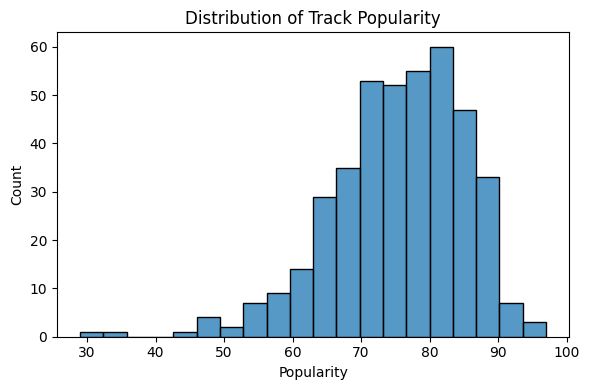

In [39]:
# 2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram?

def popularity_hist(df):
    plt.figure(figsize=(6,4))
    sns.histplot(df["popularity"], bins=20, kde=False)
    plt.title("Distribution of Track Popularity")
    plt.xlabel("Popularity")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

popularity_hist(df)

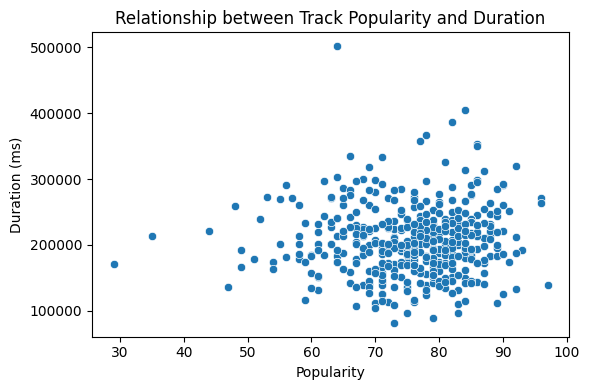

In [40]:
# 3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot?

def popularity_duration_scatter(df):
    plt.figure(figsize=(6,4))
    sns.scatterplot(x="popularity", y="duration_ms", data=df)
    plt.title("Relationship between Track Popularity and Duration")
    plt.xlabel("Popularity")
    plt.ylabel("Duration (ms)")
    plt.tight_layout()
    plt.show()

popularity_duration_scatter(df)

The artist with the highest number of tracks is 'Drake' with 17 tracks.


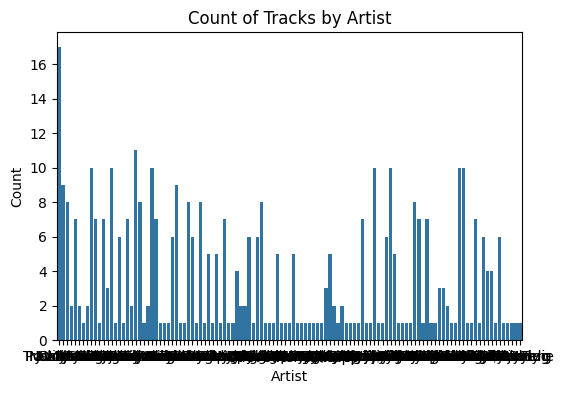

In [41]:
# 4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot?

def highest_tracks_artist(df):
    artist_track_counts = df["artist"].value_counts()
    highest_artist = artist_track_counts.idxmax()
    print(f"The artist with the highest number of tracks is '{highest_artist}' with {artist_track_counts.max()} tracks.")
    plt.figure(figsize=(6,4))
    sns.countplot(x="artist", data=df)
    plt.title("Count of Tracks by Artist")
    plt.xlabel("Artist")
    plt.ylabel("Count")
    plt.show()

    return highest_artist

highest_artist = highest_tracks_artist(df)

In [42]:
# 5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each?

def least_popular_tracks(data: pd.DataFrame, k: int = 5):
    least = data.sort_values("popularity", ascending=True).head(k)
    result = least[["artist", "track_name", "popularity"]]
    print("\nTop 5 least popular tracks:\n", result.to_string(index=False))
    return result

least_popular_tracks(df)


Top 5 least popular tracks:
         artist                    track_name  popularity
        Pressa Attachments (feat. Coi Leray)          29
 Justin Bieber                    Intentions          35
French Montana               Splash Brothers          44
      Lil Baby                 On Me - Remix          47
   Wyclef Jean     911 (feat. Mary J. Blige)          48


,artist,track_name,popularity
207,Pressa,Attachments (feat. Coi Leray),29
231,Justin Bieber,Intentions,35
413,French Montana,Splash Brothers,44
225,Lil Baby,On Me - Remix,47
407,Wyclef Jean,911 (feat. Mary J. Blige),48


In [43]:
# 6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.

def top_artists_avg_popularity(data: pd.DataFrame, top_n: int = 5):
    artist_avg = data.groupby("artist")["popularity"].mean().sort_values(ascending=False)
    top_artists = artist_avg.head(top_n)
    print(f"\nAverage popularity for top {top_n} artists:\n", top_artists)
    best_artist = top_artists.idxmax()
    print("\nArtist with highest avg popularity among them:", best_artist)
    return top_artists

top_artists_avg_popularity(df)


Average popularity for top 5 artists:
 artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: popularity, dtype: float64

Artist with highest avg popularity among them: cassö


,popularity
artist,
cassö,92.000000
Trueno,89.000000
David Guetta,87.000000
Travis Scott,86.555556
¥$,85.100000


In [44]:
# 7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

def most_popular_track_per_top_artist(data: pd.DataFrame, top_n: int = 5):
    artist_avg = data.groupby("artist")["popularity"].mean().sort_values(ascending=False)
    top_artists = artist_avg.head(top_n).index

    rows = []
    for a in top_artists:
        sub = data[data["artist"] == a]
        top_track = sub.sort_values("popularity", ascending=False).iloc[0]
        rows.append({
            "artist": a,
            "track_name": top_track["track_name"],
            "popularity": top_track["popularity"]
        })
    result = pd.DataFrame(rows)
    print(f"\nMost popular track for each of the top {top_n} artists:\n",
          result.to_string(index=False))
    return result

most_popular_track_per_top_artist(df)


Most popular track for each of the top 5 artists:
       artist                   track_name  popularity
       cassö                        Prada          92
      Trueno Mamichula - con Nicki Nicole          89
David Guetta           Baby Don't Hurt Me          87
Travis Scott   FE!N (feat. Playboi Carti)          93
          ¥$                     CARNIVAL          96


,artist,track_name,popularity
0,cassö,Prada,92
1,Trueno,Mamichula - con Nicki Nicole,89
2,David Guetta,Baby Don't Hurt Me,87
3,Travis Scott,FE!N (feat. Playboi Carti),93
4,¥$,CARNIVAL,96


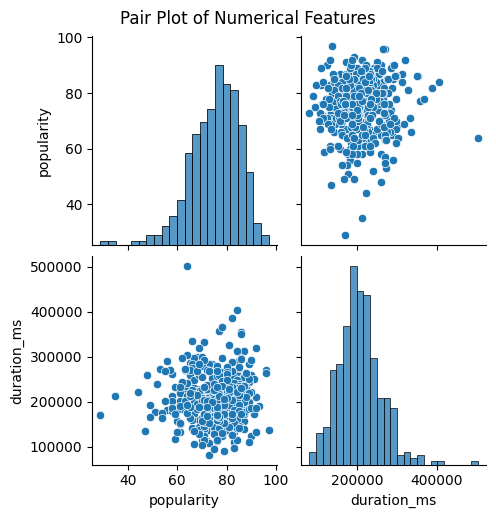

In [45]:
# 8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.

def pairplot(data: pd.DataFrame):
    sns.pairplot(data[["popularity", "duration_ms"]])
    plt.suptitle("Pair Plot of Numerical Features", y=1.02)
    plt.show()

pairplot(df)

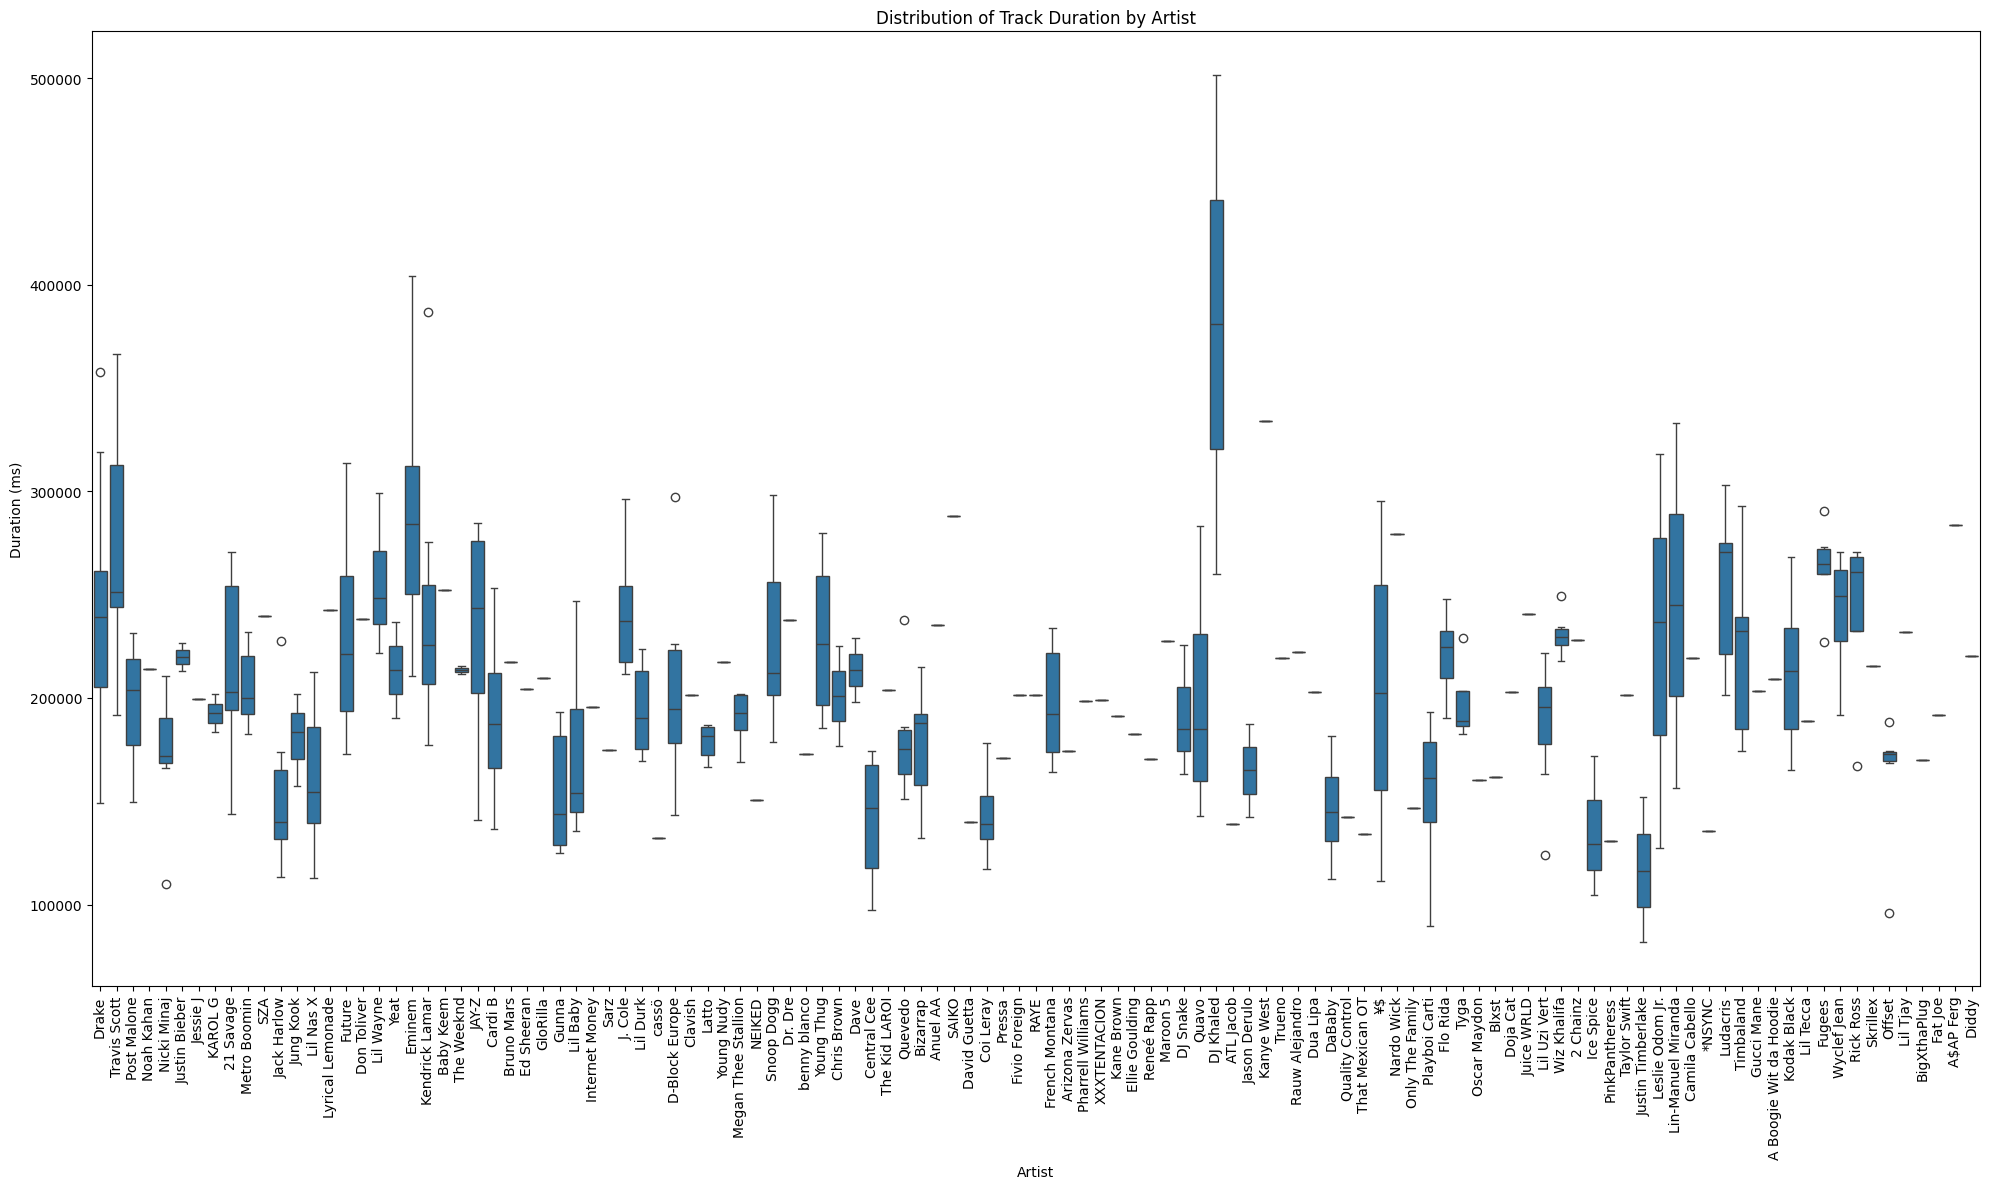

,duration_ms
artist,
DJ Khaled,380824.000000
Kanye West,334253.000000
SAIKO,288000.000000
Eminem,285642.181818
A$AP Ferg,283693.000000
...,...
Ice Spice,134405.142857
That Mexican OT,133983.000000
cassö,132359.000000


In [46]:
# 9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot?

def duration_boxplot(data: pd.DataFrame):
    plt.figure(figsize=(20,12))
    sns.boxplot(x="artist", y="duration_ms", data=data)
    plt.title("Distribution of Track Duration by Artist")
    plt.xlabel("Artist")
    plt.ylabel("Duration (ms)")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    return data.groupby("artist")["duration_ms"].mean().sort_values(ascending=False)

duration_boxplot(df)

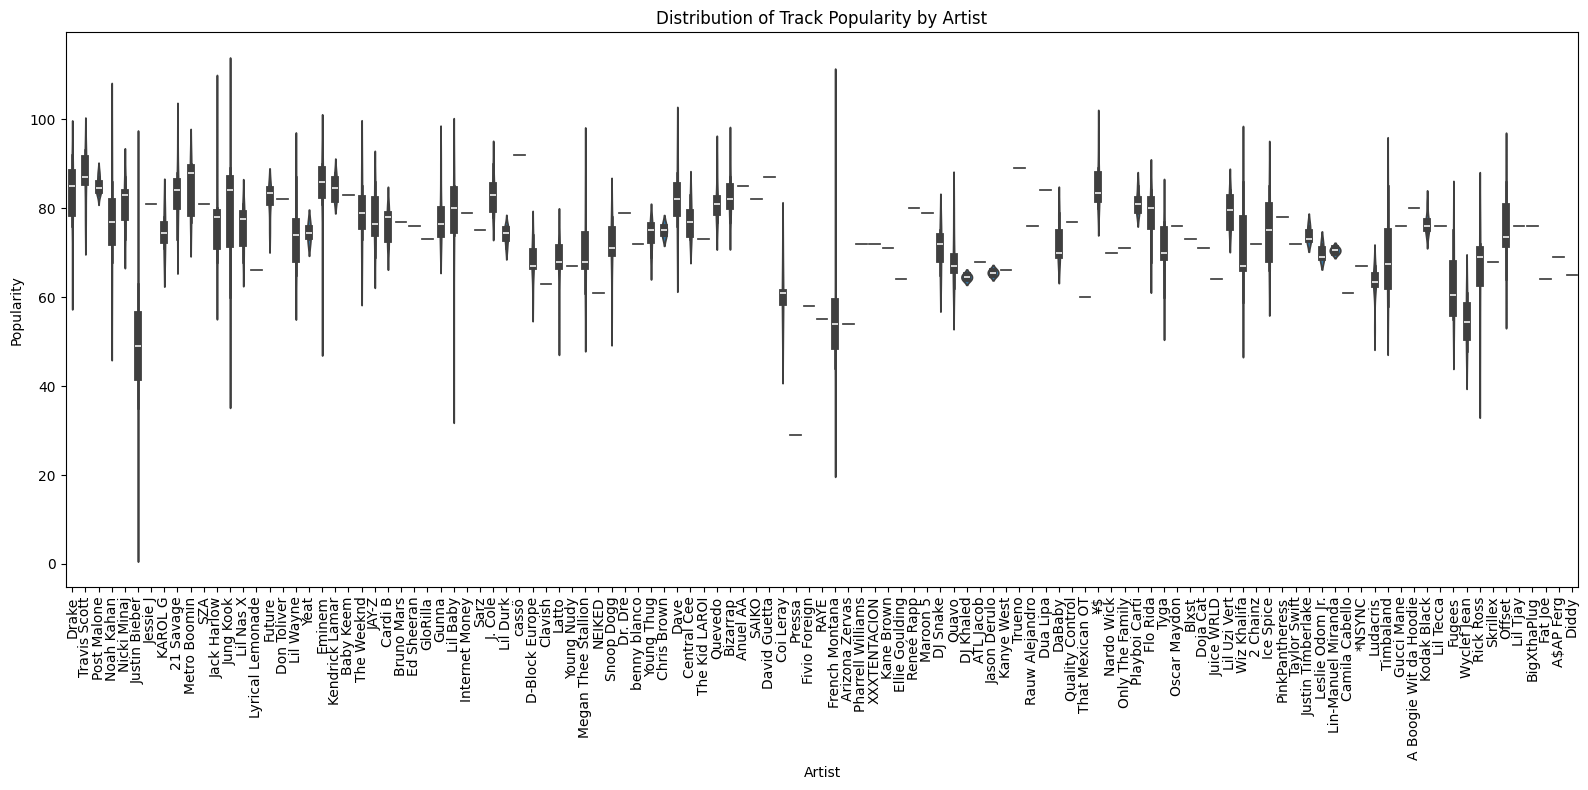

In [47]:
# 10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

def popularity_swarm(data: pd.DataFrame):
    plt.figure(figsize=(16,8))
    sns.violinplot(x="artist", y="popularity", data=data)
    plt.title("Distribution of Track Popularity by Artist")
    plt.xlabel("Artist")
    plt.ylabel("Popularity")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

popularity_swarm(df)